## Loading the dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

## Data Preprocessing

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_features = df.drop(['label'], axis=1)
train_target = df['label']

## Plot the number of digit classes

Text(0.5, 1.0, 'The number of digit classes')

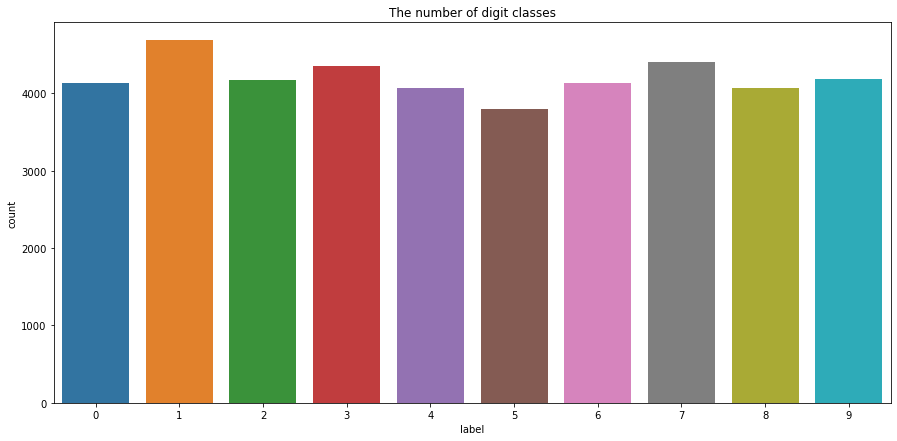

In [11]:
plt.figure(figsize=(15, 7))
sns.countplot(x=train_target)
plt.title("The number of digit classes")

In [12]:
#printing the shape of x and y
print(train_target.shape)
print(train_features.shape)

(42000,)
(42000, 784)


## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2, random_state = 0)

## Modeling with SVC

In [14]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', C=4)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)

## Evaluating the model

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9797619047619047
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       813
           1       0.99      0.99      0.99       961
           2       0.98      0.98      0.98       860
           3       0.99      0.96      0.97       863
           4       0.98      0.97      0.98       827
           5       0.97      0.98      0.98       756
           6       0.98      0.99      0.99       841
           7       0.98      0.98      0.98       899
           8       0.97      0.98      0.97       768
           9       0.98      0.96      0.97       812

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [16]:
# Normalization
X_train=np.array(X_train)/255 
X_test=np.array(X_test)/255
#One-hot encoding
y_train=np_utils.to_categorical(y_train) 
y_test=np_utils.to_categorical(y_test)

## Modeling with ANN

In [22]:
from keras.models import Sequential
import keras.activations
from keras.layers import Activation, Dense

#Initializing the ANN
ann = Sequential()
#Adding the input layer and the first hidden layer
ann.add(Dense(units=512, activation='relu',input_shape=train_features.shape[1:]))
ann.add(Dense(units=256, activation='relu'))
#Adding the output layer
ann.add(Dense(units=10, activation='softmax'))

##### Compiling the ANN

In [23]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Training the ANN on the Training set

In [24]:
hist= ann.fit(X_train, y_train, batch_size = 250, epochs = 10)

Epoch 1/10
135/135 [==============================] - 1s 8ms/step - loss: 0.3575 - accuracy: 0.8983
Epoch 2/10
135/135 [==============================] - 2s 12ms/step - loss: 0.1267 - accuracy: 0.9627
Epoch 3/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 4/10
135/135 [==============================] - 1s 11ms/step - loss: 0.0510 - accuracy: 0.9846
Epoch 5/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0353 - accuracy: 0.9901
Epoch 6/10
135/135 [==============================] - 1s 10ms/step - loss: 0.0249 - accuracy: 0.9929
Epoch 7/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0212 - accuracy: 0.9941
Epoch 8/10
135/135 [==============================] - 1s 9ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 9/10
135/135 [==============================] - 2s 12ms/step - loss: 0.0111 - accuracy: 0.9969
Epoch 10/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0078 - accuracy:

## Making the predictions and evaluating the model

Text(0, 0.5, 'accuracy')

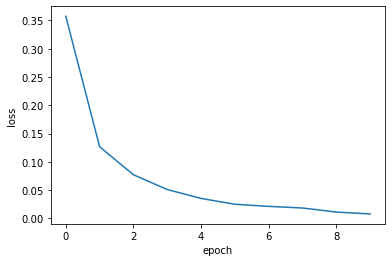

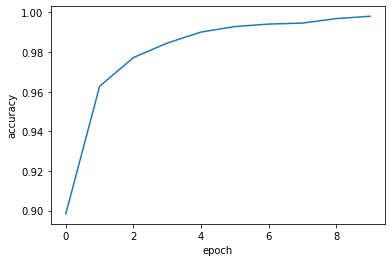

In [26]:
from sklearn.metrics import classification_report

loss=hist.history['loss']
acc=hist.history['accuracy']

plt.figure()
plt.plot(loss)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.figure()
plt.plot(acc)
plt.xlabel("epoch")
plt.ylabel("accuracy")

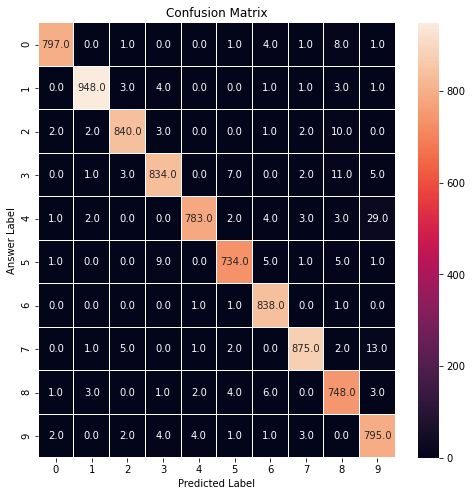

In [29]:
pred = ann.predict(X_test)
y_pred = np.argmax(pred,axis=1)
y_answer = np.argmax(y_test, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_answer, y_pred)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt='.1f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('Answer Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
#compute the accuracy
print(accuracy_score(y_answer,y_pred))

0.9752380952380952


#### ROC Curve

C:\Users\Saif\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Saif\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Saif\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Saif\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Saif\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

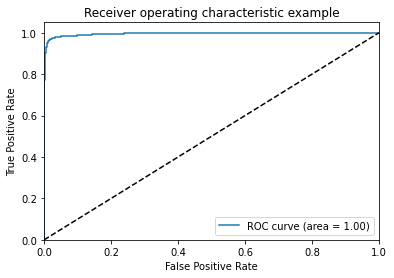

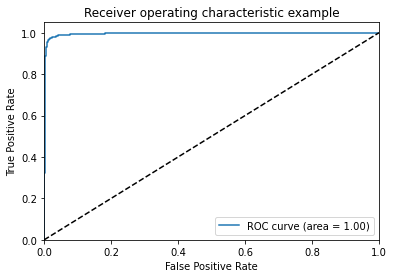

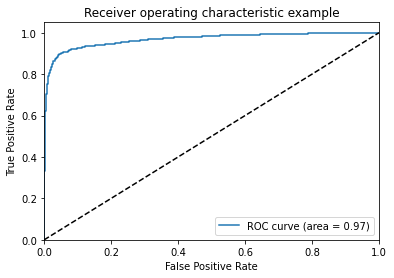

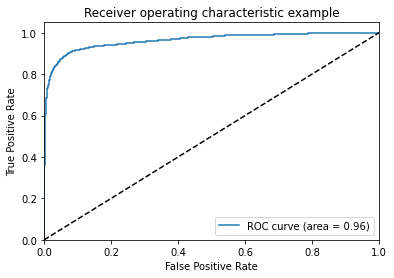

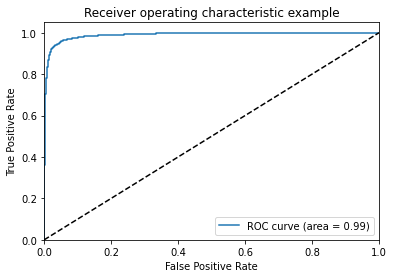

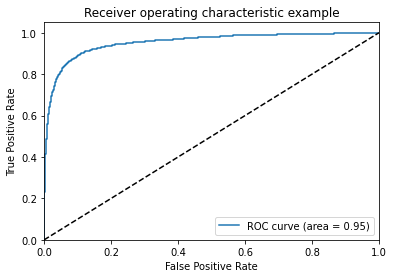

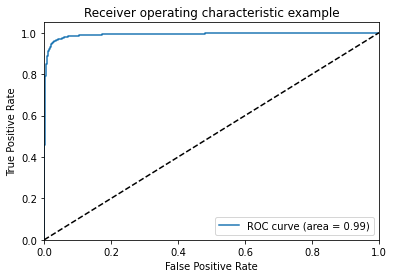

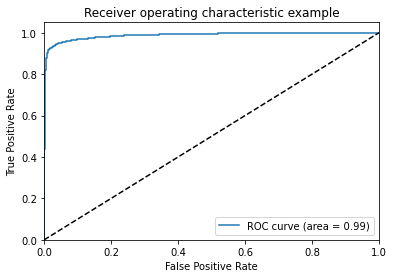

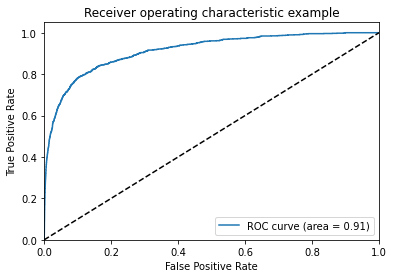

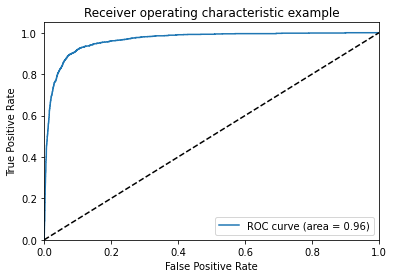

In [42]:
import sklearn.metrics as metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc

train_target = label_binarize(train_target, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(train_features, train_target, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()